# 第6章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

## 50. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ、300次元）をダウンロードし、"United States"の単語ベクトルを表示せよ。ただし、"United States"は内部的には"United_States"と表現されていることに注意せよ。

In [6]:
!uv pip install gensim

Using Python 3.11.10 environment at: /Users/ryuichi/.venv
Audited 1 package in 26ms


In [7]:
from gensim.models import KeyedVectors

model_path = '../data/GoogleNews-vectors-negative300.bin.gz'
# Google Colabに直接アップロードした場合などは '/content/GoogleNews-vectors-negative300.bin.gz' のようになることもあります。

try:
    # モデルの読み込み (時間がかかることがあります)
    print("単語ベクトルモデルを読み込んでいます... (数分かかる場合があります)")
    word_vectors = KeyedVectors.load_word2vec_format(model_path, binary=True)
    print("モデルの読み込みが完了しました。")

    # "United States" (内部表現 "United_States") の単語ベクトルを取得
    target_word = "United_States"

    if target_word in word_vectors:
        vector_united_states = word_vectors[target_word]
        print(f"\n単語 '{target_word}' のベクトル:")
        print(vector_united_states)
        print(f"\nベクトルの次元数: {len(vector_united_states)}")
    else:
        print(f"エラー: 単語 '{target_word}' はボキャブラリ内に見つかりませんでした。")
        print(f"代わりに 'United States' で試してみます...")
        target_word_alt = "United States" # スペース区切りも試す (通常は _ 区切り)
        if target_word_alt in word_vectors:
            vector_united_states = word_vectors[target_word_alt]
            print(f"\n単語 '{target_word_alt}' のベクトル:")
            print(vector_united_states)
            print(f"\nベクトルの次元数: {len(vector_united_states)}")
        else:
            print(f"エラー: 単語 '{target_word_alt}' もボキャブラリ内に見つかりませんでした。")


except FileNotFoundError:
    print(f"エラー: 指定されたパスにファイルが見つかりません: {model_path}")
    print("Google Newsの単語ベクトルファイルをダウンロードし、正しいパスを指定してください。")
except Exception as e:
    print(f"モデルの読み込み中またはベクトル取得中にエラーが発生しました: {e}")

単語ベクトルモデルを読み込んでいます... (数分かかる場合があります)
モデルの読み込みが完了しました。

単語 'United_States' のベクトル:
[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281

## 51. 単語の類似度

"United States"と"U.S."のコサイン類似度を計算せよ。

In [4]:
if 'word_vectors' not in locals() or word_vectors is None:
    print("エラー: 単語ベクトルモデル 'word_vectors' が読み込まれていません。")
    print("問題50のコードを実行して、先にモデルをロードしてください。")
else:
    word1 = "United_States"  # 問題50で確認した表現
    word2 = "U.S."          # "U.S." の表現

    try:
        # まず、各単語がボキャブラリに存在するか確認
        if word1 not in word_vectors:
            print(f"警告: 単語 '{word1}' がボキャブラリにありません。")
        
        # 両方の単語がボキャブラリに存在する場合のみ類似度を計算
        if word1 in word_vectors and word2 in word_vectors:
            similarity = word_vectors.similarity(word1, word2)
            print(f"'{word1}' と '{word2}' のコサイン類似度: {similarity:.4f}")
        else:
            print(f"必要な単語の少なくとも一方がボキャブラリにないため、類似度を計算できませんでした。")

    except KeyError as e:
        print(f"エラー: 単語 '{e}' がボキャブラリ内に見つかりませんでした。")
    except Exception as e:
        print(f"類似度の計算中にエラーが発生しました: {e}")

'United_States' と 'U.S.' のコサイン類似度: 0.7311


## 52. 類似度の高い単語10件

"United States"とコサイン類似度が高い10語と、その類似度を出力せよ。

In [5]:
if 'word_vectors' not in locals() or word_vectors is None:
    print("エラー: 単語ベクトルモデル 'word_vectors' が読み込まれていません。")
    print("問題50のコードを実行して、先にモデルをロードしてください。")
else:
    target_word = "United_States"

    try:
        if target_word in word_vectors:
            # 類似度の高い単語トップ10を取得
            similar_words = word_vectors.most_similar(positive=[target_word], topn=10)
            
            print(f"'{target_word}' とコサイン類似度が高い単語トップ10:")
            for word, similarity in similar_words:
                print(f"- {word}: {similarity:.4f}")
        else:
            print(f"エラー: 単語 '{target_word}' はボキャブラリ内に見つかりませんでした。")

    except KeyError as e:
        # most_similar内で単語が見つからない場合もKeyErrorになることがある
        print(f"エラー: 単語 '{e}' がボキャブラリ内に見つかりませんでした。")
    except Exception as e:
        print(f"類似度の高い単語の取得中にエラーが発生しました: {e}")

'United_States' とコサイン類似度が高い単語トップ10:
- Unites_States: 0.7877
- Untied_States: 0.7541
- United_Sates: 0.7401
- U.S.: 0.7311
- theUnited_States: 0.6404
- America: 0.6178
- UnitedStates: 0.6167
- Europe: 0.6133
- countries: 0.6045
- Canada: 0.6019


## 53. 加法構成性によるアナロジー

"Spain"の単語ベクトルから"Madrid"のベクトルを引き、"Athens"のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。

In [6]:
if 'word_vectors' not in locals() or word_vectors is None:
    print("エラー: 単語ベクトルモデル 'word_vectors' が読み込まれていません。")
    print("問題50のコードを実行して、先にモデルをロードしてください。")
else:
    word_spain = "Spain"
    word_madrid = "Madrid"
    word_athens = "Athens"

    try:
        # 必要な単語がボキャブラリに存在するか確認
        required_words = [word_spain, word_madrid, word_athens]
        missing_words = [word for word in required_words if word not in word_vectors]

        if missing_words:
            print(f"エラー: ボキャブラリに存在しない単語があります: {', '.join(missing_words)}")
        else:
            # most_similar を使ってアナロジー計算と類似単語の取得を一度に行う
            # calculation: vec(Spain) - vec(Madrid) + vec(Athens)
            # most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])
            
            similar_words_analogy = word_vectors.most_similar(
                positive=[word_spain, word_athens], 
                negative=[word_madrid], 
                topn=10
            )
            
            print(f"vec('{word_spain}') - vec('{word_madrid}') + vec('{word_athens}') に類似する単語トップ10:")
            for word, similarity in similar_words_analogy:
                print(f"- {word}: {similarity:.4f}")

    except KeyError as e:
        print(f"エラー: 単語 '{e}' がボキャブラリ内に見つかりませんでした（most_similarの内部で発生）。")
    except Exception as e:
        print(f"アナロジー計算または類似単語の取得中にエラーが発生しました: {e}")

vec('Spain') - vec('Madrid') + vec('Athens') に類似する単語トップ10:
- Greece: 0.6898
- Aristeidis_Grigoriadis: 0.5607
- Ioannis_Drymonakos: 0.5553
- Greeks: 0.5451
- Ioannis_Christou: 0.5401
- Hrysopiyi_Devetzi: 0.5248
- Heraklio: 0.5208
- Athens_Greece: 0.5169
- Lithuania: 0.5167
- Iraklion: 0.5147


## 54. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし、国と首都に関する事例（`: capital-common-countries`セクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。

In [10]:
import requests # ファイルダウンロード用

# word_vectors は問題50で読み込まれた KeyedVectors オブジェクトとします。
if 'word_vectors' not in locals() or word_vectors is None:
    print("エラー: 単語ベクトルモデル 'word_vectors' が読み込まれていません。")
    print("問題50のコードを実行して、先にモデルをロードしてください。")
    # このセル以降の処理を中断するために、ここで None を代入するなどの処置をしてもよい
    # word_vectors = None 
else:
    # 1. 評価データのダウンロード
    url = "http://download.tensorflow.org/data/questions-words.txt"
    file_name = "questions-words.txt"
    
    try:
        response = requests.get(url)
        response.raise_for_status() # エラーがあればここで例外発生
        with open(file_name, 'wb') as f:
            f.write(response.content)
        print(f"'{file_name}' をダウンロードしました。")
    except requests.exceptions.RequestException as e:
        print(f"ファイルのダウンロード中にエラーが発生しました: {e}")
        file_name = None # エラーの場合はファイル名をNoneに

    if file_name:
        analogy_results = []
        target_section = ": capital-common-countries"
        in_section = False

        try:
            with open(file_name, 'r', encoding='utf-8') as f:
                for line in f:
                    line = line.strip()
                    if line.startswith(":"):
                        in_section = (line == target_section)
                        if in_section:
                            print(f"\nセクション '{target_section}' の処理を開始します...")
                        elif line.startswith(":") and in_section: # 他のセクションが始まったら終了
                            print(f"セクション '{target_section}' の処理を終了します。")
                            break 
                        continue

                    if in_section:
                        words = line.split()
                        if len(words) == 4:
                            w1, w2, w3, w4_true = words[0], words[1], words[2], words[3]
                            
                            # 使用する単語がボキャブラリに存在するか確認
                            # most_similar に渡す単語 (w1, w2, w3)
                            analogy_input_words = [w2, w3, w1] 
                            missing_input_words = [word for word in analogy_input_words if word not in word_vectors]

                            if missing_input_words:
                                # print(f"  スキップ (入力単語不足): {line} - 不足: {', '.join(missing_input_words)}")
                                continue

                            try:
                                # vec(w2) - vec(w1) + vec(w3) に最も類似する単語を取得
                                # most_similar は [(単語, 類似度), ...] のリストを返す
                                result = word_vectors.most_similar(positive=[w2, w3], negative=[w1], topn=1)
                                w4_pred, similarity = result[0]
                                
                                analogy_results.append({
                                    "w1": w1, "w2": w2, "w3": w3, "w4_true": w4_true,
                                    "w4_pred": w4_pred, "similarity": similarity
                                })
                                # 結果を一部表示 (大量に出力されるのを避けるため、ここでは表示しない)
                                # print(f"  {w1} : {w2} :: {w3} : {w4_true}  =>  予測: {w4_pred} ({similarity:.4f})")

                            except KeyError as e:
                                # most_similar の中で内部的にKeyErrorが発生する場合もある
                                # print(f"  スキップ (KeyError in most_similar): {line} - 単語: {e}")
                                continue
                        else:
                            # print(f"  スキップ (フォーマット不正): {line}")
                            pass # フォーマットが不正な行は無視

        except FileNotFoundError:
            print(f"エラー: ファイル '{file_name}' が見つかりません。")
        except Exception as e:
            print(f"ファイル処理またはアナロジー計算中にエラー: {e}")
            
        if analogy_results:
            print(f"\n'{target_section}' セクションから {len(analogy_results)} 件のアナロジー結果を記録しました。")
            print("最初の5件の結果:")
            for i, res in enumerate(analogy_results[:5]):
                print(f"  {res['w1']} : {res['w2']} :: {res['w3']} : {res['w4_true']}  =>  予測: {res['w4_pred']} ({res['similarity']:.4f})")
            
            # (オプション) 結果をファイルに保存する場合
            # import json
            # with open("analogy_capital-common-countries_results.json", "w", encoding="utf-8") as outfile:
            #    json.dump(analogy_results, outfile, ensure_ascii=False, indent=2)
            # print("\n結果を analogy_capital-common-countries_results.json に保存しました。")
        else:
            if target_section and not in_section: # target_section自体が見つからなかった場合
                 print(f"エラー: 指定されたセクション '{target_section}' がファイル内に見つかりませんでした。")
            elif file_name: # ファイルはあったが、結果が0件だった場合
                 print("処理可能なアナロジー事例がありませんでした（ボキャブラリ不足、またはセクション内容なし）。")

'questions-words.txt' をダウンロードしました。

セクション ': capital-common-countries' の処理を開始します...

': capital-common-countries' セクションから 506 件のアナロジー結果を記録しました。
最初の5件の結果:
  Athens : Greece :: Baghdad : Iraq  =>  予測: Iraqi (0.6352)
  Athens : Greece :: Bangkok : Thailand  =>  予測: Thailand (0.7138)
  Athens : Greece :: Beijing : China  =>  予測: China (0.7236)
  Athens : Greece :: Berlin : Germany  =>  予測: Germany (0.6735)
  Athens : Greece :: Bern : Switzerland  =>  予測: Switzerland (0.4920)


## 55. アナロジータスクでの正解率

54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

In [11]:
# analogy_results は問題54で作成されたアナロジー結果のリストとします。
# このリストの各要素は以下のような辞書であることを想定しています:
# {
#     "w1": w1, "w2": w2, "w3": w3, "w4_true": w4_true,
#     "w4_pred": w4_pred, "similarity": similarity
# }

if 'analogy_results' not in locals() or not analogy_results:
    print("エラー: 'analogy_results' が存在しないか空です。")
    print("問題54を先に実行して、アナロジー結果を生成・記録してください。")
else:
    correct_predictions = 0
    total_cases = len(analogy_results)

    for item in analogy_results:
        # 予測された単語と正解の単語を比較
        # 大文字・小文字を区別して比較する場合 (通常、このデータセットではそのように評価します)
        if item['w4_pred'] == item['w4_true']:
            correct_predictions += 1
        # (オプション) 大文字・小文字を区別しない場合は .lower() を使う
        # if item['w4_pred'].lower() == item['w4_true'].lower():
        #     correct_predictions += 1
            
    if total_cases > 0:
        accuracy = (correct_predictions / total_cases) * 100
        print(f"アナロジーデータセクション: : capital-common-countries (意味的アナロジー)")
        print(f"処理した事例数: {total_cases}")
        print(f"正解数: {correct_predictions}")
        print(f"正解率: {accuracy:.2f}%")
    else:
        print("評価対象の事例がありませんでした。")

# 文法的アナロジーについて:
# もし他のセクション（例:文法的アナロジーのセクション）も問題54で処理し、
# その結果が別のリスト (例: syntactic_analogy_results) に格納されている場合は、
# 同様のロジックでそのリストに対する正解率も計算できます。
# 今回は :capital-common-countries のみだったので、上記の結果が主となります。

アナロジーデータセクション: : capital-common-countries (意味的アナロジー)
処理した事例数: 506
正解数: 421
正解率: 83.20%


## 56. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。

In [12]:
!uv pip install pandas

Using Python 3.11.10 environment at: /Users/ryuichi/.venv
Audited 1 package in 30ms


In [13]:
import pandas as pd
from scipy.stats import spearmanr
import requests
import zipfile
import io

# word_vectors は問題50で読み込まれた KeyedVectors オブジェクトとします。
if 'word_vectors' not in locals() or word_vectors is None:
    print("エラー: 単語ベクトルモデル 'word_vectors' が読み込まれていません。")
    print("問題50のコードを実行して、先にモデルをロードしてください。")
    # word_vectors = None # 以降の処理を止めるためにNoneを代入
else:
    # 1. WordSimilarity-353 データセットのダウンロードと展開
    ws353_url = "http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip"
    ws353_csv_filename = "combined.csv"
    df_ws353 = None

    try:
        print(f"'{ws353_url}' からWordSimilarity-353データセットをダウンロードしています...")
        response = requests.get(ws353_url)
        response.raise_for_status()
        
        with zipfile.ZipFile(io.BytesIO(response.content)) as z:
            # zipファイル内の combined.csv を直接pandasで読み込む
            if ws353_csv_filename in z.namelist():
                with z.open(ws353_csv_filename) as csv_file:
                    df_ws353 = pd.read_csv(csv_file)
                print(f"'{ws353_csv_filename}' を読み込みました。")
            else:
                print(f"エラー: zipファイル内に '{ws353_csv_filename}' が見つかりません。")
                # 代替として、もし 'wordsim353.csv' があればそれを使う試み (ファイル名が異なる場合があるため)
                alt_csv_filename = "wordsim353.csv" 
                if alt_csv_filename in z.namelist():
                    print(f"代替ファイル '{alt_csv_filename}' を試します...")
                    with z.open(alt_csv_filename) as csv_file:
                         df_ws353 = pd.read_csv(csv_file)
                    print(f"'{alt_csv_filename}' を読み込みました。")
                else:
                    print(f"エラー: zipファイル内に '{alt_csv_filename}' も見つかりません。")

    except requests.exceptions.RequestException as e:
        print(f"データセットのダウンロード中にエラーが発生しました: {e}")
    except zipfile.BadZipFile:
        print("エラー: ダウンロードしたファイルが正しいzipファイルではありません。")
    except Exception as e:
        print(f"データセットの処理中に予期せぬエラーが発生しました: {e}")

    if df_ws353 is not None:
        print("\nWordSimilarity-353 データセットの最初の5行:")
        print(df_ws353.head())

        human_scores = []
        model_scores = []
        pairs_processed_count = 0
        pairs_skipped_count = 0

        # 4. 類似度スコアの収集
        # 列名が 'Word 1', 'Word 2', 'Human (mean)' であることを想定
        # 実際の列名に合わせて調整が必要な場合があります。
        col_word1 = 'Word 1'
        col_word2 = 'Word 2'
        col_human_score = 'Human (mean)'

        # df_ws353.columns を確認して、実際の列名に合わせる
        if not {col_word1, col_word2, col_human_score}.issubset(df_ws353.columns):
            print(f"\nエラー: CSVファイルに必要な列 ('{col_word1}', '{col_word2}', '{col_human_score}') が見つかりません。")
            print(f"実際の列名: {df_ws353.columns.tolist()}")
            print("コード内の col_word1, col_word2, col_human_score 変数を実際の列名に修正してください。")
        else:
            for index, row in df_ws353.iterrows():
                word1 = row[col_word1]
                word2 = row[col_word2]
                human_score = row[col_human_score]

                # 単語がボキャブラリに存在するか確認
                if word1 in word_vectors and word2 in word_vectors:
                    model_similarity = word_vectors.similarity(word1, word2)
                    human_scores.append(float(human_score)) # human_scoreが文字列の場合があるのでfloatに変換
                    model_scores.append(model_similarity)
                    pairs_processed_count += 1
                else:
                    pairs_skipped_count += 1
                    # print(f"スキップ: '{word1}' または '{word2}' がボキャブラリにありません。")
            
            print(f"\n処理した単語ペア数: {pairs_processed_count}")
            print(f"スキップした単語ペア数 (ボキャブラリ不足): {pairs_skipped_count}")

            if len(human_scores) > 1 and len(model_scores) > 1 : # スピアマン相関は少なくとも2つのデータポイントが必要
                # 5. スピアマン相関係数の計算
                correlation, p_value = spearmanr(human_scores, model_scores)
                print(f"\nスピアマン相関係数: {correlation:.4f}")
                print(f"P値: {p_value:.4g}") # p_valueは相関の有意性を示す
            else:
                print("\nスピアマン相関係数を計算するための十分なデータポイントがありません。")
    else:
        if df_ws353 is None: # df_ws353がNoneのままなら（読み込み失敗など）
            print("WordSimilarity-353 データセットを読み込めませんでした。処理を中断します。")

'http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip' からWordSimilarity-353データセットをダウンロードしています...
'combined.csv' を読み込みました。

WordSimilarity-353 データセットの最初の5行:
     Word 1    Word 2  Human (mean)
0      love       sex          6.77
1     tiger       cat          7.35
2     tiger     tiger         10.00
3      book     paper          7.46
4  computer  keyboard          7.62

処理した単語ペア数: 353
スキップした単語ペア数 (ボキャブラリ不足): 0

スピアマン相関係数: 0.7000
P値: 2.869e-53


## 57. k-meansクラスタリング

国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

In [14]:
!uv pip install scikit-learn

Using Python 3.11.10 environment at: /Users/ryuichi/.venv
Audited 1 package in 3ms


In [15]:
import numpy as np
from sklearn.cluster import KMeans
# pandas は国名リストの取得に使うかもしれない (問題54の結果を利用する場合)
# import pandas as pd 

# word_vectors は問題50で読み込まれた KeyedVectors オブジェクト、
# analogy_results は問題54で記録されたアナロジー結果のリストとします。

if 'word_vectors' not in locals() or word_vectors is None:
    print("エラー: 単語ベクトルモデル 'word_vectors' が読み込まれていません。")
    print("問題50のコードを実行して、先にモデルをロードしてください。")
elif 'analogy_results' not in locals() or not analogy_results:
    print("エラー: 'analogy_results' が存在しないか空です。")
    print("問題54を先に実行して、アナロジー結果を生成・記録してください。")
else:
    # 1. 国名リストの準備 (問題54の結果から抽出)
    country_names_from_analogy = set()
    for item in analogy_results:
        # w2 と w4_true が国名であると仮定 (capital-common-countries セクションの場合)
        country_names_from_analogy.add(item['w2'])
        country_names_from_analogy.add(item['w4_true'])
    
    print(f"問題54の結果から抽出したユニークな国名（候補）の数: {len(country_names_from_analogy)}")

    # 2. 単語ベクトルの抽出
    country_vectors = []
    valid_country_names = [] # ボキャブラリに存在し、ベクトルを抽出できた国名
    
    for country_name in sorted(list(country_names_from_analogy)): # ソートして処理順を一定に
        if country_name in word_vectors:
            country_vectors.append(word_vectors[country_name])
            valid_country_names.append(country_name)
        # else:
            # print(f"単語 '{country_name}' はボキャブラリにないためスキップします。")
            
    if not valid_country_names or not country_vectors:
        print("エラー: ボキャブラリに存在する国名が見つからなかったか、ベクトルを抽出できませんでした。")
    else:
        print(f"ボキャブラリに存在し、ベクトルを抽出した国名の数: {len(valid_country_names)}")
        
        # リストをnumpy配列に変換
        X_countries = np.array(country_vectors)
        
        # 3. k-meansクラスタリングの実行
        k = 5
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto') # random_stateで結果を固定, n_initで警告抑制
        clusters = kmeans.fit_predict(X_countries)
        
        print(f"\nk-meansクラスタリング (k={k}) を実行しました。")
        
        # 4. 結果の確認 (各クラスタに含まれる国名を表示)
        print("\n各クラスタに含まれる国名 (最初の数件):")
        for i in range(k):
            cluster_members = [valid_country_names[j] for j, label in enumerate(clusters) if label == i]
            print(f"クラスタ {i}:")
            if cluster_members:
                # あまりに多い場合は一部だけ表示
                print(f"  メンバー数: {len(cluster_members)}")
                print(f"  例: {', '.join(cluster_members[:10])}{'...' if len(cluster_members) > 10 else ''}")
            else:
                print("  メンバーなし")

問題54の結果から抽出したユニークな国名（候補）の数: 23
ボキャブラリに存在し、ベクトルを抽出した国名の数: 23

k-meansクラスタリング (k=5) を実行しました。

各クラスタに含まれる国名 (最初の数件):
クラスタ 0:
  メンバー数: 2
  例: Afghanistan, Iraq
クラスタ 1:
  メンバー数: 3
  例: Greece, Italy, Spain
クラスタ 2:
  メンバー数: 11
  例: Australia, Canada, England, Finland, France, Germany, Japan, Norway, Russia, Sweden...
クラスタ 3:
  メンバー数: 3
  例: China, Thailand, Vietnam
クラスタ 4:
  メンバー数: 4
  例: Cuba, Egypt, Iran, Pakistan


## 58. Ward法によるクラスタリング

国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。

In [16]:
!brew install --cask font-ipafont

Ward法による階層型クラスタリングを実行し、デンドログラムを可視化します...
警告: フォント 'IPAPGothic' が見つかりません (ValueError)。
警告: フォント 'IPAGothic' も見つかりません (ValueError)。
macOSの標準的な日本語フォント 'Hiragino Sans' を試します...
フォント 'Hiragino Sans' を使用します。 Path: /System/Library/Fonts/ヒラギノ角ゴシック W4.ttc


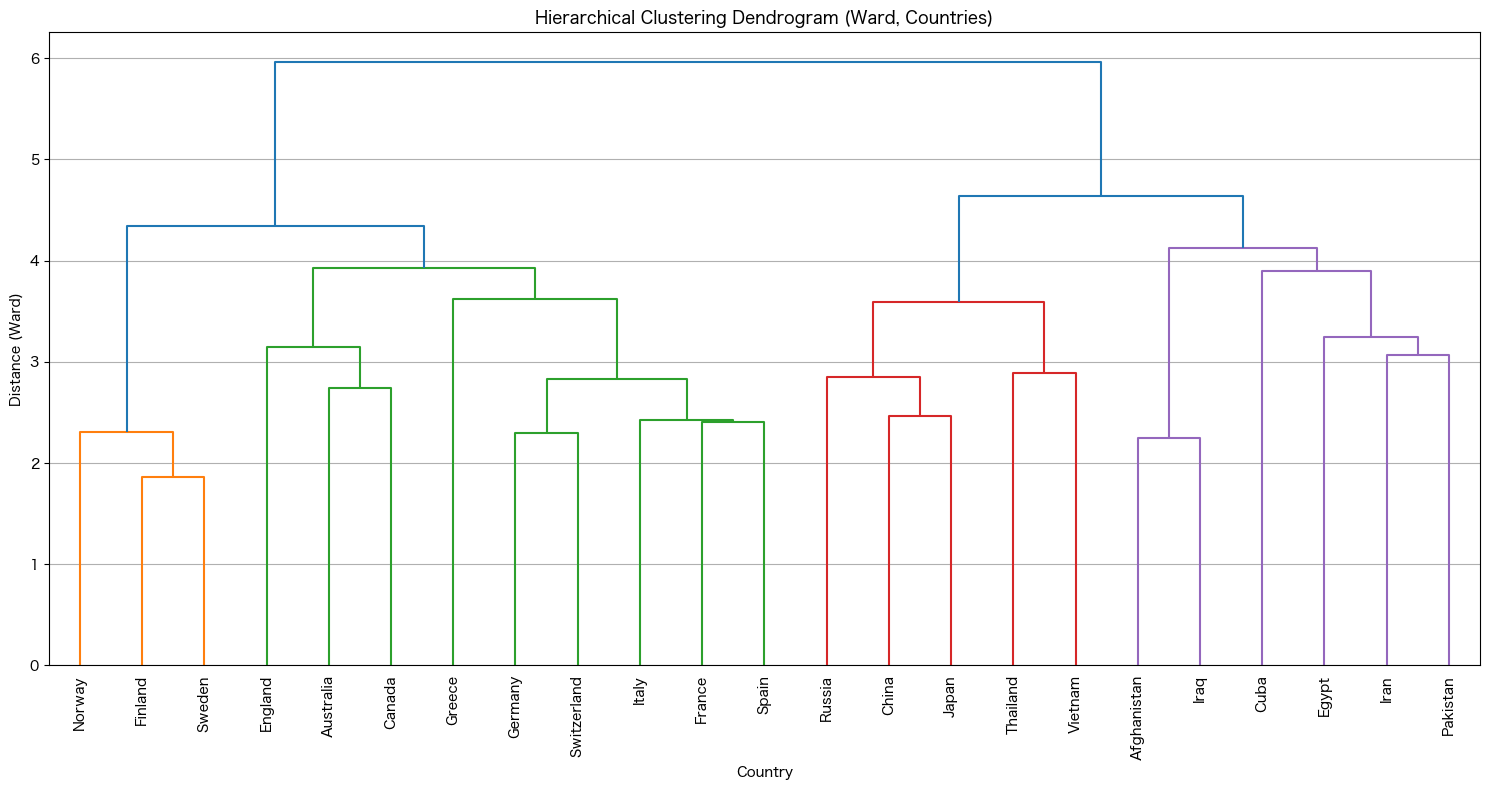

In [20]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import matplotlib.font_manager # 日本語フォント設定用 (環境によっては不要/設定方法が異なる)

# X_countries (国名ベクトルのnumpy配列) と 
# valid_country_names (国名のリスト) は問題57から引き継がれると仮定します。

if 'X_countries' not in locals() or 'valid_country_names' not in locals() \
   or X_countries is None or valid_country_names is None:
    print("エラー: 'X_countries' または 'valid_country_names' が定義されていません。")
    print("問題57のコードを先に実行して、これらの変数を準備してください。")
else:
    if len(valid_country_names) < 2:
        print("エラー: クラスタリングを行うには少なくとも2つの国名が必要です。")
    else:
        print("Ward法による階層型クラスタリングを実行し、デンドログラムを可視化します...")
        
        # 3. Ward法による階層型クラスタリングの実行
        # linkage_matrix はクラスタリングの連結情報（リンケージ行列）
        linkage_matrix = linkage(X_countries, method='ward', metric='euclidean')
        
        # 4. デンドログラムの可視化
        plt.figure(figsize=(15, 8)) # プロットのサイズを調整
        
        try:
            font_path_found = None
            font_successfully_set = False # フォント設定が成功したかのフラグ

            # まず 'IPAPGothic' (プロポーショナルIPA Pゴシック) を試す
            font_name_to_try = 'IPAPGothic'
            try:
                jp_font_path = matplotlib.font_manager.findfont(font_name_to_try, fallback_to_default=False)
                plt.rcParams['font.family'] = font_name_to_try
                print(f"フォント '{font_name_to_try}' を使用します。 Path: {jp_font_path}")
                font_successfully_set = True
            except ValueError: # findfont がフォントを見つけられない場合の主なエラー
                print(f"警告: フォント '{font_name_to_try}' が見つかりません (ValueError)。")
            
            if not font_successfully_set:
                # 次に 'IPAGothic' (等幅IPAゴシック) を試す
                font_name_to_try_alt = 'IPAGothic'
                try:
                    jp_font_path_alt = matplotlib.font_manager.findfont(font_name_to_try_alt, fallback_to_default=False)
                    plt.rcParams['font.family'] = font_name_to_try_alt
                    print(f"フォント '{font_name_to_try_alt}' を使用します。 Path: {jp_font_path_alt}")
                    font_successfully_set = True
                except ValueError:
                    print(f"警告: フォント '{font_name_to_try_alt}' も見つかりません (ValueError)。")

            if not font_successfully_set:
                print("macOSの標準的な日本語フォント 'Hiragino Sans' を試します...")
                # macOS標準のヒラギノを試す
                font_name_hiragino = 'Hiragino Sans'
                try:
                    jp_font_path_hira = matplotlib.font_manager.findfont(font_name_hiragino, fallback_to_default=False)
                    plt.rcParams['font.family'] = font_name_hiragino
                    print(f"フォント '{font_name_hiragino}' を使用します。 Path: {jp_font_path_hira}")
                    font_successfully_set = True
                except ValueError:
                    print(f"警告: '{font_name_hiragino}' も見つかりません (ValueError)。")

            if not font_successfully_set:
                print("警告: 指定した日本語フォントのいずれも見つからなかったため、デフォルトの 'sans-serif' フォントを使用します。日本語ラベルが文字化けする可能性があります。")
                plt.rcParams['font.family'] = 'sans-serif'
            
        except Exception as e: # 上記以外の予期せぬエラー
            print(f"日本語フォント設定の試行中に予期せぬエラー: {e}。日本語ラベルが文字化けする可能性があります。")
            plt.rcParams['font.family'] = 'sans-serif' # 念のためフォールバック
            print("デフォルトの 'sans-serif' フォントを使用します（エラー発生のため）。")


        except Exception as e: # 上記以外の予期せぬエラー
            print(f"日本語フォント設定の試行中に予期せぬエラー: {e}。日本語ラベルが文字化けする可能性があります。")
            plt.rcParams['font.family'] = 'sans-serif' # 念のためフォールバック
            print("デフォルトの 'sans-serif' フォントを使用します（エラー発生のため）。")

        dendrogram(
            linkage_matrix,
            labels=valid_country_names,
            leaf_rotation=90.,  # ラベルを90度回転して読みやすくする
            leaf_font_size=10.  # ラベルのフォントサイズ
        )
        
        plt.title('Hierarchical Clustering Dendrogram (Ward, Countries)')
        plt.xlabel('Country')
        plt.ylabel('Distance (Ward)')
        plt.grid(axis='y') # 横軸のグリッド線
        plt.tight_layout() # レイアウトを調整してラベルがはみ出ないようにする
        plt.show()

## 59. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。

t-SNEによる次元削減と可視化を実行します...


/Users/ryuichi/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNEによる2次元への次元削減が完了しました。


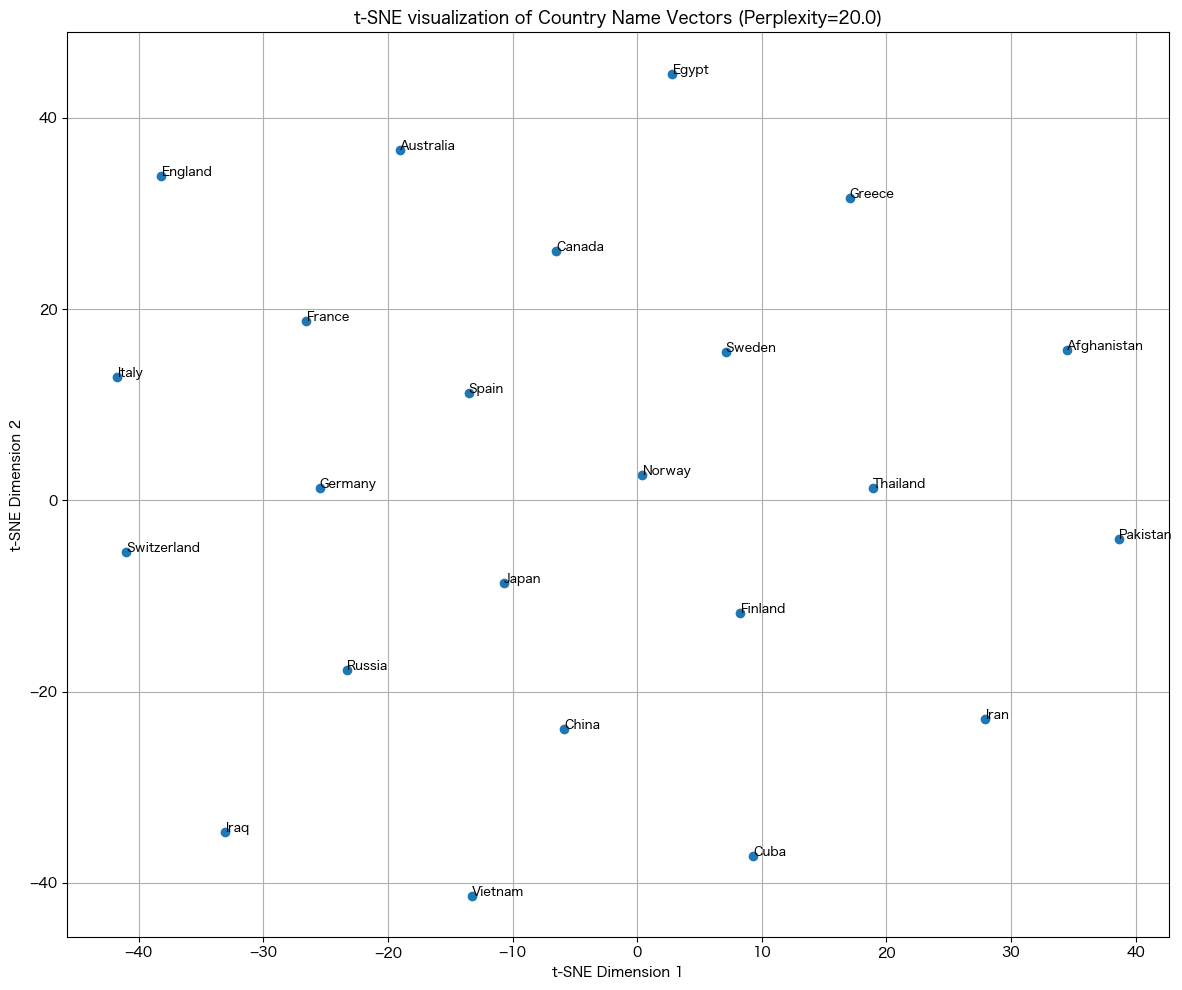

In [21]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# import matplotlib.font_manager # 問題58でフォント設定済みであれば再度は不要かも

# X_countries (国名ベクトルのnumpy配列) と 
# valid_country_names (国名のリスト) は問題57/58から引き継がれると仮定します。

if 'X_countries' not in locals() or 'valid_country_names' not in locals() \
   or X_countries is None or valid_country_names is None:
    print("エラー: 'X_countries' または 'valid_country_names' が定義されていません。")
    print("問題57のコードを先に実行して、これらの変数を準備してください。")
else:
    if len(valid_country_names) < 2:
        print("エラー: 可視化を行うには少なくとも2つの国名が必要です。")
    # perplexity はサンプル数より小さい必要がある。 len(valid_country_names)-1 以下。
    # サンプル数が23なので、perplexityは5～20程度が適切か。
    elif len(valid_country_names) <= 5: # perplexityの推奨範囲より小さい場合
        print(f"エラー: サンプル数 ({len(valid_country_names)}) がt-SNEのperplexityの典型的な下限よりも少ないため、意味のある結果を得るのが難しいかもしれません。")
    else:
        print("t-SNEによる次元削減と可視化を実行します...")
        
        # perplexityの値を調整 (サンプル数23に対して適切な値)
        # サンプル数より小さい値である必要がある。一般的に5-50。
        # len(valid_country_names) が23なので、perplexity は 5 や 10、15 などが良い。
        # デフォルトの30だと大きすぎる。
        perplexity_value = min(20.0, float(len(valid_country_names) - 1)) 
        if perplexity_value < 5.0 and len(valid_country_names) > 1: # 極端に少ない場合も調整
             perplexity_value = float(len(valid_country_names) -1)


        # 3. t-SNEの実行
        tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0, n_iter=1000, learning_rate='auto', init='pca')
        X_embedded = tsne.fit_transform(X_countries)
        
        print("t-SNEによる2次元への次元削減が完了しました。")
        
        # 4. 結果の可視化
        plt.figure(figsize=(12, 10)) # プロットのサイズを調整
        
        # 問題58で設定した日本語フォントが引き続き有効であることを期待
        # もし文字化けする場合は、再度フォント設定の確認が必要
        # plt.rcParams['font.family'] = 'Hiragino Sans' # macOSの場合の例 (再設定が必要なら)

        plt.scatter(X_embedded[:, 0], X_embedded[:, 1], marker='o')
        
        for i, country_name in enumerate(valid_country_names):
            plt.annotate(country_name, (X_embedded[i, 0], X_embedded[i, 1]), fontsize=9)
            
        plt.title(f't-SNE visualization of Country Name Vectors (Perplexity={perplexity_value:.1f})')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.grid(True)
        plt.tight_layout()
        plt.show()